 Step 1 & 2: Import Libraries and Download Dataset from UCI Repository

In [7]:
# Step 1: Import libraries
import pandas as pd
import zipfile
import urllib.request
import os

# Step 2: Download ZIP from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
zip_path = "/content/bank.zip"

urllib.request.urlretrieve(url, zip_path)
print("Downloaded successfully.")


Downloaded successfully.


Step 3: Extract the ZIP File and List Extracted Files

In [8]:
# Step 3: Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/bank_data")

# Check extracted files
print("Extracted files:", os.listdir("/content/bank_data"))


Extracted files: ['bank.csv', 'bank-full.csv', 'bank-names.txt', 'bank.zip', 'bank-additional.zip']


Step 4: Load the CSV File into a DataFrame

In [9]:
# Step 4: Load CSV
csv_path = "/content/bank_data/bank-full.csv"
data = pd.read_csv(csv_path, sep=';')
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Step 5: Encode Categorical Columns Using Label Encoding

In [10]:
# Step 5: Encode categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


Step 6: Split the Dataset into Features and Target for Training and Testing

In [11]:
# Step 6: Split data into features and target
X = data.drop("y", axis=1)
y = data["y"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


 Step 7: Train the Gaussian Naïve Bayes Classifier

In [12]:
# Step 7: Train Naïve Bayes classifier
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

Step 8: Evaluate the Model Performance with Accuracy, Classification Report, and Confusion Matrix

Accuracy: 0.8321

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     11966
           1       0.34      0.45      0.39      1598

    accuracy                           0.83     13564
   macro avg       0.63      0.67      0.64     13564
weighted avg       0.85      0.83      0.84     13564



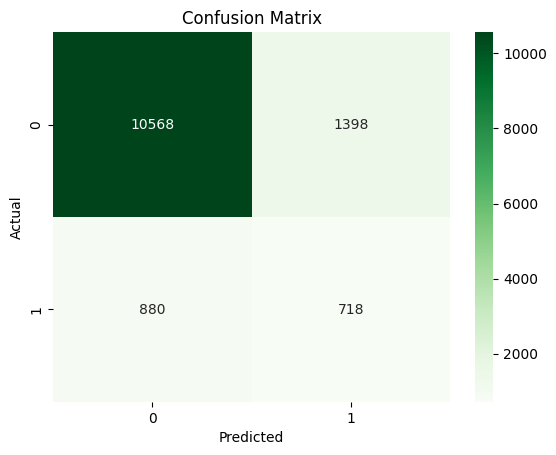

In [13]:
# Step 8: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Step 9: Feature Importance Visualization Based on Gaussian Naïve Bayes Means

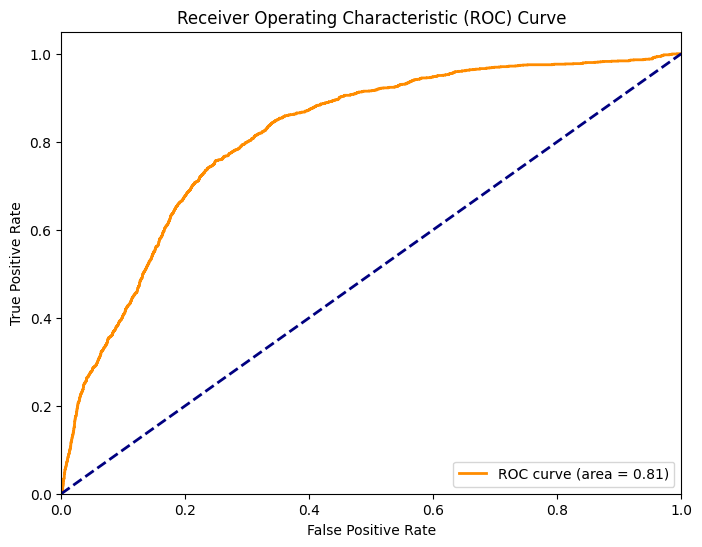

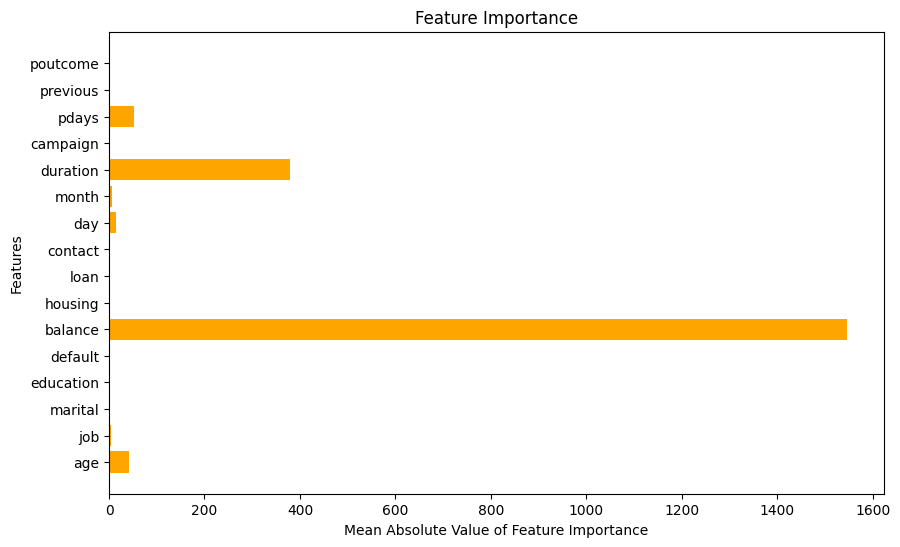

In [16]:
# Step 9: ROC Curve Visualization
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Step 10: Feature Importance Visualization (for Gaussian Naive Bayes, we use the absolute value of means)
import numpy as np

# Calculate feature importance based on mean values of each feature
importances = np.abs(model.theta_).mean(axis=0)

# Plot feature importance
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='orange')
plt.title("Feature Importance")
plt.xlabel("Mean Absolute Value of Feature Importance")
plt.ylabel("Features")
plt.show()
